In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
# for solve problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# optional
import warnings
warnings.filterwarnings('ignore')
plt.style.use('_mpl-gallery')
font = {'fontsize':16, 'fontstyle':'italic', 'backgroundcolor':'black', 'color':'white'} # for plot title

In [ ]:
# import from sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split , GridSearchCV, KFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.naive_bayes import MultinomialNB, ComplementNB, CategoricalNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
data = pd.read_csv('drug dataset.csv')
data

Age Sex      BP Cholesterol  Na_to_K Drug_Type
0     23   F    HIGH        HIGH   25.355     DrugY
1     47   M     LOW        HIGH   13.093     drugC
2     47   M     LOW        HIGH   10.114     drugC
3     28   F  NORMAL        HIGH    7.798     drugX
4     61   F     LOW        HIGH   18.043     drugA
..   ...  ..     ...         ...      ...       ...
244   34   F    HIGH      NORMAL   11.740     drugA
245   56   M     LOW        HIGH   11.740     drugB
246   41   F    HIGH      NORMAL   11.740     drugB
247   38   F    HIGH      NORMAL   11.740     drugC
248   46   M     LOW      NORMAL   11.740     drugB

[249 rows x 6 columns]

In [ ]:
df = pd.DataFrame(data)
print(f'df Shape: {df.shape}')
df.head()

df Shape: (249, 6)


Age Sex      BP Cholesterol  Na_to_K Drug_Type
0   23   F    HIGH        HIGH   25.355     DrugY
1   47   M     LOW        HIGH   13.093     drugC
2   47   M     LOW        HIGH   10.114     drugC
3   28   F  NORMAL        HIGH    7.798     drugX
4   61   F     LOW        HIGH   18.043     drugA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          249 non-null    int64  
 1   Sex          249 non-null    object 
 2   BP           249 non-null    object 
 3   Cholesterol  249 non-null    object 
 4   Na_to_K      249 non-null    float64
 5   Drug_Type    249 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 11.8+ KB


***From the above information:***

1. It seems that there is no missing data, which will
be checked further.
2. There are 4 categorical feature including Sex, BP, Cholesterol, Drug_Type
3. There are to numerical feature including Na_to_k, Age

##**Cleaning the Data**

In [ ]:
# check missing values:
df.isna().sum().to_frame('isna').T

Age  Sex  BP  Cholesterol  Na_to_K  Drug_Type
isna    0    0   0            0        0          0

In [ ]:
# check duplicated data
print(f"Number of duplicated: {df.duplicated().sum()}")

Number of duplicated: 14


In [ ]:
# Number of unique values in each categorical data:
categorical = df.select_dtypes(['object'])
for var in categorical:
    print(f"{var} contains {df[var].nunique()} labels")
    print(df[var].value_counts())
    print('-'*30)

Sex contains 2 labels
Sex
M    127
F    122
Name: count, dtype: int64
------------------------------
BP contains 3 labels
BP
HIGH      111
LOW        79
NORMAL     59
Name: count, dtype: int64
------------------------------
Cholesterol contains 2 labels
Cholesterol
NORMAL    131
HIGH      118
Name: count, dtype: int64
------------------------------
Drug_Type contains 5 labels
Drug_Type
drugA    59
drugX    53
DrugY    49
drugB    46
drugC    42
Name: count, dtype: int64
------------------------------


In [ ]:
# now convert categorical to numerical:
df2 = df.copy()
df2['Sex'] = df2.Sex.replace(['M', 'F'], [3, 2])
df2['BP'] = df2.BP.replace(['HIGH', 'NORMAL', 'LOW'], [4, 3, 2])
df2['Cholesterol'] = df2.Cholesterol.replace(['HIGH', 'NORMAL'], [3, 2])
df2['Drug_Type'] = df2.Drug_Type.replace(['DrugY', 'drugX', 'drugA', 'drugC', 'drugB'], [1, 2, 3, 4, 5])
df2

Age  Sex  BP  Cholesterol  Na_to_K  Drug_Type
0     23    2   4            3   25.355          1
1     47    3   2            3   13.093          4
2     47    3   2            3   10.114          4
3     28    2   3            3    7.798          2
4     61    2   2            3   18.043          3
..   ...  ...  ..          ...      ...        ...
244   34    2   4            2   11.740          3
245   56    3   2            3   11.740          5
246   41    2   4            2   11.740          5
247   38    2   4            2   11.740          4
248   46    3   2            2   11.740          5

[249 rows x 6 columns]

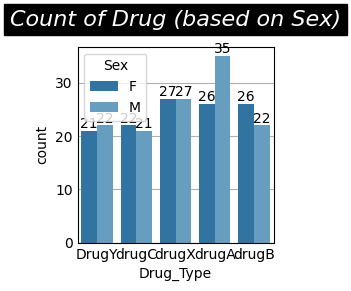

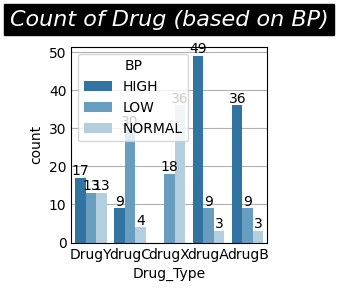

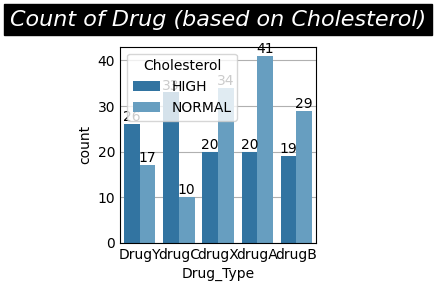

In [ ]:
# count of purchased based on Gender
import seaborn as sns
%matplotlib inline
for col in ['Sex','BP','Cholesterol']:
    ax = sns.countplot(data=df, x='Drug_Type', hue=col)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f'Count of Drug (based on {col})', fontdict=font, pad=15)
    plt.show()

1. A, B, and C drugs are mostly prescribed for male.
Drug X is equally prescribed for male and female.
2. Y drug is mostly prescribed for female.
3. The people who were prescribed drug B all had HIGH BP, and the people who were prescribed drug C all had LOW BP.
4. For people who had normal BP, only one of X or Y drugs was prescribed.
5. A and B drugs have not been prescribed for any of the people with LOW BP.
6. X and C drugs have not been prescribed for any of the people with HIGH BP.
7. Drug C has not been prescribed for any of the people who have HIGH Cholesterol.


only scatterplot of natok vs age based on drug type from pandas

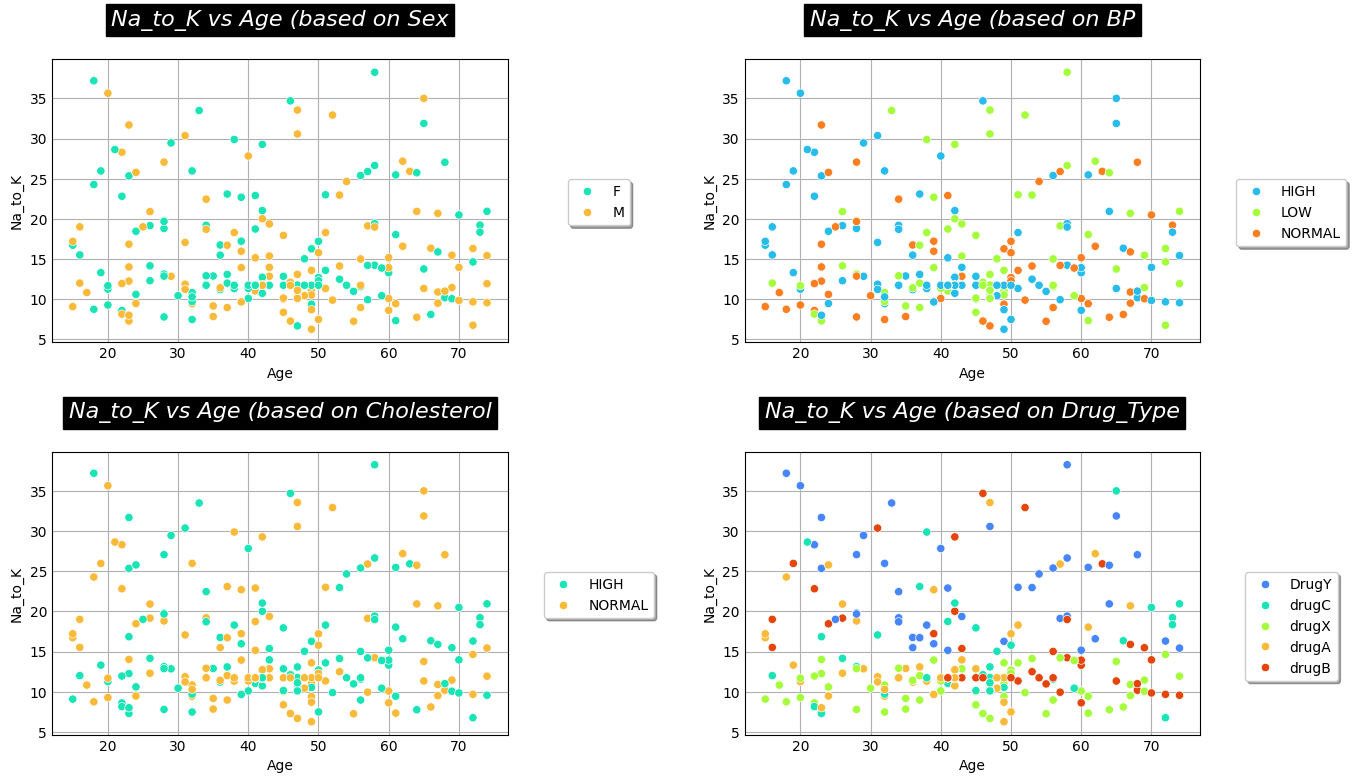

In [ ]:
# use scatter plot for numerics feature (Age and Na_to_K)
fig, ax = plt.subplots(2,2,figsize=(14,8))
for i, col in enumerate(['Sex', 'BP', 'Cholesterol', 'Drug_Type']):
    sns.scatterplot(data=df, x='Age', y='Na_to_K', hue=col, ax=ax[i//2, i%2], palette='turbo')
    ax[i//2, i%2].set_title(f'Na_to_K vs Age (based on {col}', y=1.09, **font)
    ax[i//2, i%2].legend(loc='upper center', bbox_to_anchor=(1.2, 0.6),
        fancybox=True, shadow=True)

fig.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Columns to encode
categorical_columns = ['Sex', 'BP', 'Cholesterol']

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# For the target variable
df['Drug_Type'] = label_encoder.fit_transform(df['Drug_Type'])

# Splitting the dataset into features and target variable
x = df.drop('Drug_Type', axis=1)
y = df['Drug_Type']

# Splitting the dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)


In [ ]:
# Splitting the dataset into training and testing sets
x = df.drop('Drug_Type', axis=1)
y = df['Drug_Type']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

1. Using **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize the classifier
nb_classifier = GaussianNB()

# Fit the model
nb_classifier.fit(X_train, y_train)

# Predictions
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))


Naive Bayes Accuracy: 0.6


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        14
           1       0.43      0.86      0.57         7
           2       0.67      0.33      0.44         6
           3       0.75      0.25      0.38        12
           4       0.60      0.82      0.69        11

    accuracy                           0.60        50
   macro avg       0.63      0.59      0.56        50
weighted avg       0.65      0.60      0.58        50



2. **K Nearest Neighbours (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn_classifier.fit(X_train, y_train)

# Predictions
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, y_pred))


KNN Accuracy: 0.56


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.71      0.63        14
           1       0.50      0.71      0.59         7
           2       0.29      0.33      0.31         6
           3       0.67      0.33      0.44        12
           4       0.78      0.64      0.70        11

    accuracy                           0.56        50
   macro avg       0.56      0.55      0.53        50
weighted avg       0.59      0.56      0.55        50



3. **Decision Tree**

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[10  0  0  2  0]
 [ 2  5  0  0  0]
 [ 4  1  2  0  0]
 [ 2  2  3  4  2]
 [ 0  2  2  0  7]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()#default parameters used
classifier=classifier.fit(X_train,y_train)

In [ ]:
from sklearn.tree import export_graphviz
!pip install six

In [ ]:
from six import StringIO

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Encode categorical features
data_encoded = pd.get_dummies(data, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)

# Split data into features (X) and target (y)
X = data_encoded.drop(columns=['Drug_Type'])
y = data_encoded['Drug_Type']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print decision tree depth
print(f"Decision Tree Depth: {clf.get_depth()}")


Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.92      0.71        12
           1       0.71      0.71      0.71         7
           2       0.33      0.14      0.20         7
           3       0.71      0.77      0.74        13
           4       1.00      0.64      0.78        11

    accuracy                           0.68        50
   macro avg       0.67      0.64      0.63        50
weighted avg       0.69      0.68      0.66        50

Decision Tree Depth: 3


Classification Report:
              precision    recall  f1-score   support

           1       0.55      0.92      0.69        12
           2       1.00      0.64      0.78        11
           3       0.62      0.71      0.67         7
           4       0.71      0.77      0.74        13
           5       1.00      0.14      0.25         7

    accuracy                           0.68        50
   macro avg       0.78      0.64      0.62        50
weighted avg       0.77      0.68      0.66        50

Decision Tree Depth: 3


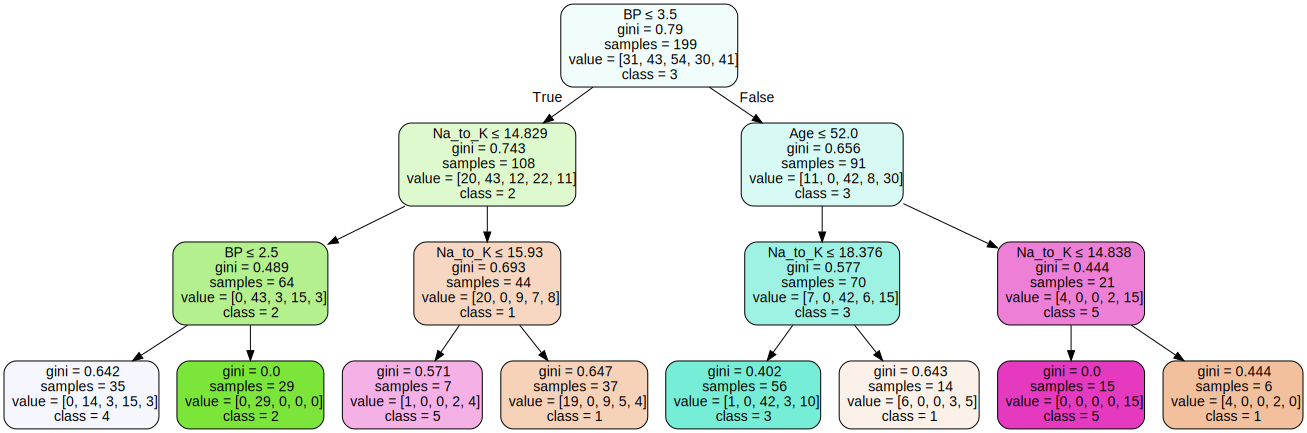

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz

# Assuming df2 is your DataFrame after the conversions
X = df2.drop('Drug_Type', axis=1)
y = df2['Drug_Type']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the depth of the decision tree
print(f"Decision Tree Depth: {clf.get_depth()}")

# Visualize the Decision Tree using graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
                                class_names=['1', '2', '3', '4', '5'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

graph


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

from sklearn.model_selection import train_test_split

# Assuming 'X' is your features DataFrame and 'y' is your labels Series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming x_train, x_test, y_train, y_test are already defined and preprocessed appropriately
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=4)  # for depth 4 now accuracy comes
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.78


4. **Support Vector Machine**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming 'X' and 'y' are your dataset's features and target variable respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 42 random stae accuracy is 1

# Initialize the classifier
svm_classifier = SVC(kernel='linear')

# Fit the model
svm_classifier.fit(X_train, y_train)

# Predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)


SVM Accuracy: 0.66


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.71      0.83      0.77        12
           2       0.69      0.82      0.75        11
           3       0.46      0.86      0.60         7
           4       0.86      0.46      0.60        13
           5       0.67      0.29      0.40         7

    accuracy                           0.66        50
   macro avg       0.68      0.65      0.62        50
weighted avg       0.70      0.66      0.65        50



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[9 0 3 0 1]
 [0 8 1 2 0]
 [2 0 7 0 1]
 [2 1 0 4 1]
 [1 2 3 1 1]]


5. **Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=27)

print("xtrain:", xtrain)
print("xtest:", xtest)
print("ytrain:", ytrain)
print("ytest:", ytest)

xtrain:      Age  Sex  BP  Cholesterol  Na_to_K
206   47    1   1            0   10.114
123   36    0   2            0   16.753
166   58    0   1            0   26.645
152   55    1   2            1    7.261
244   34    0   0            1   11.740
..   ...  ...  ..          ...      ...
56    65    1   0            1   11.340
31    74    1   0            0    9.567
72    24    0   2            0   10.605
184   18    0   0            0   37.188
19    32    0   0            1   25.974

[174 rows x 5 columns]
xtest:      Age  Sex  BP  Cholesterol  Na_to_K
107   42    1   1            0   20.013
216   49    0   0            1   11.740
10    47    0   1            0   11.767
147   26    0   0            1   12.307
201   47    1   1            0   10.130
..   ...  ...  ..          ...      ...
232   41    0   1            1   11.740
140   49    1   0            1    6.269
101   45    0   0            0   12.854
43    23    1   2            0   12.260
115   51    1   0            0   18.295



In [ ]:
from sklearn.linear_model import LogisticRegression
regModel=LogisticRegression()
regModel.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
y_predict=regModel.predict(xtest)
regModel.predict_proba(xtest)

array([[4.03568313e-01, 9.86620108e-04, 1.73952777e-01, 2.98673099e-01,
        1.22819191e-01],
       [3.67481617e-02, 4.39176162e-02, 3.10200787e-01, 1.10785379e-01,
        4.98348056e-01],
       [1.47482113e-01, 1.21142915e-01, 9.66338532e-02, 4.18174653e-01,
        2.16566465e-01],
       [6.90759444e-02, 1.61213941e-02, 5.25101689e-01, 1.15580140e-01,
        2.74120832e-01],
       [8.87785384e-02, 2.04302619e-01, 2.28343498e-01, 3.28079292e-01,
        1.50496053e-01],
       [1.57799793e-01, 4.09691692e-01, 4.70038516e-02, 3.24226970e-01,
        6.12776932e-02],
       [2.11875960e-01, 5.04264075e-05, 4.02052789e-01, 1.78657015e-01,
        2.07363809e-01],
       [1.46197363e-01, 2.16023504e-02, 1.23406908e-01, 3.65518137e-01,
        3.43275241e-01],
       [2.00521299e-02, 1.22426730e-01, 2.34300711e-01, 9.45318372e-02,
        5.28688593e-01],
       [2.68985799e-02, 1.95826943e-02, 6.62552467e-01, 6.92252081e-02,
        2.21741051e-01],
       [4.71992054e-02, 1.8731

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(ytest,y_predict)
print(confusion_matrix)

[[ 7  1  2  2  2]
 [ 0 13  0  0  0]
 [ 2  1 12  0  5]
 [ 1  1  1  9  3]
 [ 4  1  2  1  5]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_predict))

              precision    recall  f1-score   support

           1       0.50      0.50      0.50        14
           2       0.76      1.00      0.87        13
           3       0.71      0.60      0.65        20
           4       0.75      0.60      0.67        15
           5       0.33      0.38      0.36        13

    accuracy                           0.61        75
   macro avg       0.61      0.62      0.61        75
weighted avg       0.62      0.61      0.61        75



In [ ]:
# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(ytest, y_predict))


Logistic Regression Accuracy: 0.6133333333333333


6. **Random Forest**

Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.75      0.72        12
           2       1.00      1.00      1.00        11
           3       0.57      0.57      0.57         7
           4       0.82      0.69      0.75        13
           5       0.38      0.43      0.40         7

    accuracy                           0.72        50
   macro avg       0.69      0.69      0.69        50
weighted avg       0.73      0.72      0.72        50

Decision Tree Depth: 7


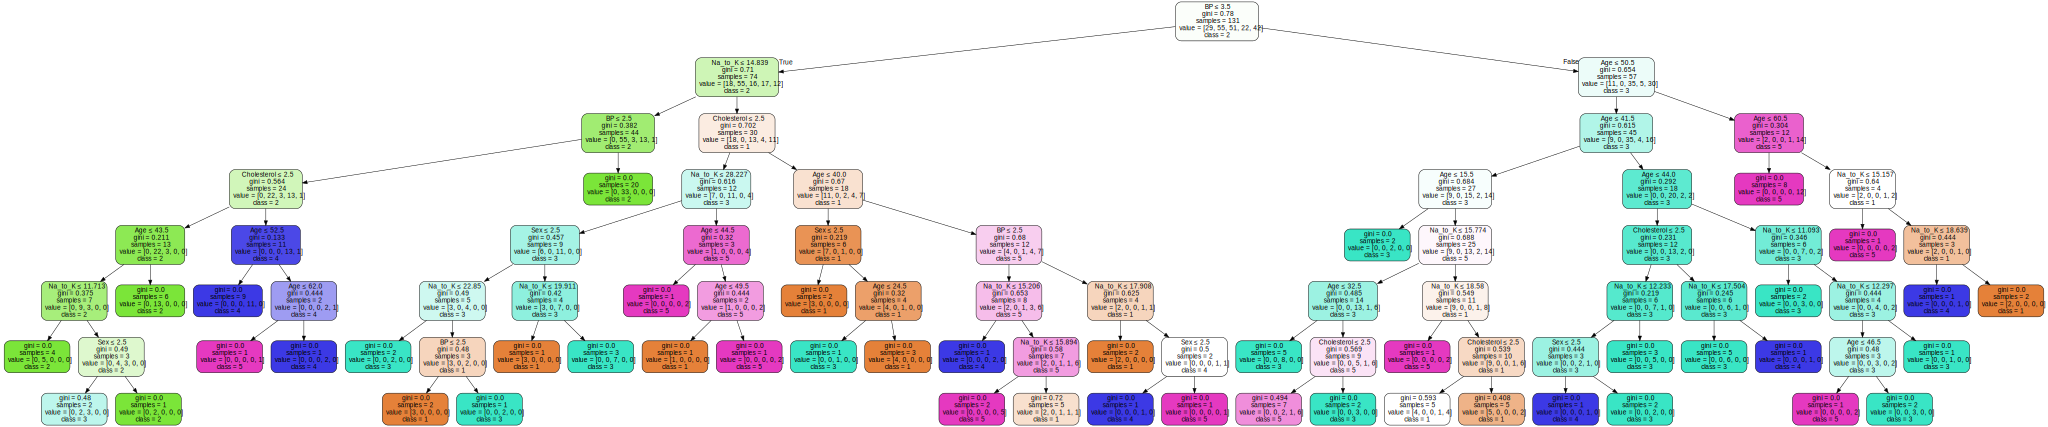

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz
import numpy as np
import pandas as pd

# Assuming df2 is your DataFrame after the conversions
X = df2.drop('Drug_Type', axis=1)
y = df2['Drug_Type']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42) # 10 onwards accuracy decreases
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Randomly select a tree from the forest (e.g., the first tree)
tree_index = 0  # Change this index as needed to visualize a different tree
tree_in_forest = clf.estimators_[tree_index]

# Print the depth of the selected decision tree in the forest
print(f"Decision Tree Depth: {tree_in_forest.get_depth()}")

# Visualize the selected Decision Tree using graphviz
dot_data = tree.export_graphviz(tree_in_forest, out_file=None,
                                feature_names=X.columns,
                                class_names=['1', '2', '3', '4', '5'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render(f"random_forest_tree_{tree_index}")  # Save the visualization to a file

graph  # Display the tree visualization


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7200
